# Piston-cylinder: Isobaric process

## Problem statement:

A piston–cylinder device contains 0.9 kg of steam at 300°C and 0.8 MPa. Steam is cooled at constant pressure until one-third of the mass condenses.
(a) Show the process on a T-v diagram and a P-v diagram
(b) Find the final temperature.
(c) Determine the volume change

![](./piston-cylinder.png)

## A function definition to help plot P-v diagram

The arguments of this function are supplied inside the paranthesis:

fluid: "Fluid of interest"

state1: [P,v] list

state2: [P,v] list

In [1]:
def plot_p_v_diagram(fluid, state1, state2, plot_const_press_line=True):
    # import the libraries we'll need
    import CoolProp.CoolProp as CP
    import numpy as np
    import matplotlib.pyplot as plt

    # define variables
    fluid = fluid  
    T_min = CP.PropsSI("Tmin", fluid) 
    T_max = CP.PropsSI("Tcrit", fluid) 
    T_vals = np.linspace(T_min, T_max, 1000) 
    Q = 1

    P_saturated_vapor = [CP.PropsSI("P", "T", T, "Q", Q, fluid) for T in T_vals]
    vol_vapor = 1 / np.array([CP.PropsSI("D", "T", T, "Q", Q, fluid) for T in T_vals])
    plt.figure(2)
    plt.plot(vol_vapor, P_saturated_vapor, "-b", label="Saturated Vapor")
    plt.xscale("log")

    Q = 0

    P_saturated_liquid = [CP.PropsSI("P", "T", T, "Q", Q, fluid) for T in T_vals]
    vol_liquid = 1 / np.array([CP.PropsSI("D", "T", T, "Q", Q, fluid) for T in T_vals])

    plt.plot(vol_liquid, P_saturated_liquid, "-g", label="Saturated Liquid")
    plt.xscale("log")

    plt.ylabel("Pressure [Pa]")  
    plt.xlabel("Specific Volume (m^3/kg)")  
    
    # Specific states
    P1 = state1[0]
    P2 = state2[0]
    
    plt.plot(state1[1], P1, "ok", label="State 1")
    plt.plot(state2[1], P2, "or", label="State 2")

    if plot_const_press_line:
        plt.axhline(y=P1, color='k', linestyle='--', label="P = constant ({} kPa)".format(round(P1/1e3,2)))
    
    plt.legend()
    plt.grid()
    plt.show()

## Solution:

In [2]:
import CoolProp.CoolProp as CP
import numpy as np
import matplotlib.pyplot as plt
def plot_T_v_diagram(fluid,state1,state2,plot_const_press_line=True):
    # import the libraries we'll need
    import CoolProp.CoolProp as CP
    import numpy as np
    import matplotlib.pyplot as plt


    # define variables
    fluid = fluid  # define the fluid or material of interest, for full list see CP.Fluidslist()
    T_min = CP.PropsSI("Tmin", fluid)  # this is the min temp we can get data for water
    T_max = CP.PropsSI("Tcrit", fluid)  # this is the max temp we can get data for water
    T_vals = np.linspace(
        T_min, T_max, 1000
    )  # define an array of values from T_min to T_max
    Q = 1  # define the steam quality as 1, which is 100% vapor


    density = [
        CP.PropsSI("D", "T", T, "Q", Q, fluid) for T in T_vals
    ]  # call for density values using CoolProp
    vol = 1 / np.array(density)  # convert density into specific volume

    plt.figure(1)
    plt.plot(vol, T_vals, "-b", label="Saturated Vapor")  # plot temp vs specific vol
    plt.xscale("log")  # use log scale on x axis


    Q = 0  # define the steam quality as 0, which is 100% liquid


    density = [
        CP.PropsSI("D", "T", T, "Q", Q, fluid) for T in T_vals
    ]  # call for density values using CoolProp
    vol = 1 / np.array(density)  # convert density into specific volume


    plt.plot(vol, T_vals, "-g", label="Saturated Liquid")  # plot temp vs specific vol
    plt.xscale("log")  # use log scale on x axis


    plt.ylabel("Temperature [K]")  # give y axis a label
    plt.xlabel("Specific Volume (m^3/kg)")  # give x axis a label
    plt.grid()
    # plot various points on the T-v diagram:

    x = [state1[0], state2[0]]  # specific volume in m3/kg
    y = [state1[1], state2[1]]  # temperature in K
    plt.plot(x[0], y[0], "ok", label="State 1")
    plt.plot(x[1], y[1], "or", label="State 2")
    if plot_const_press_line == True:
        # Plotting the constant pressure line for the given pressure:
        P_const = CP.PropsSI("P", "T", state1[1], "D", 1/state1[0], fluid)
        v_vals_constP = [1 / CP.PropsSI("D", "T", T, "P", P_const, fluid) for T in T_vals]
        plt.plot(v_vals_constP, T_vals, "--k", label="P = constant ({} kPa)".format(round(P_const/1e3,2)))
        plt.legend()
    else:
        plt.legend()
        

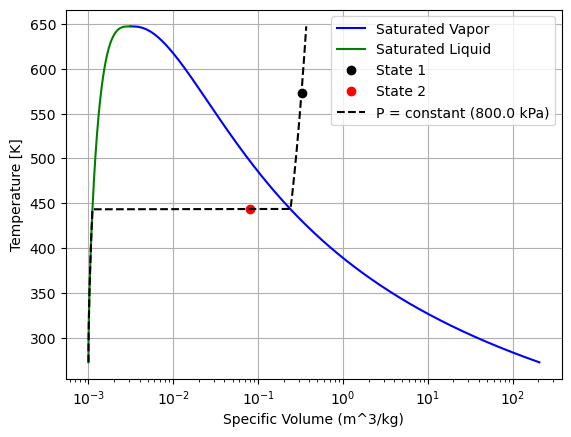

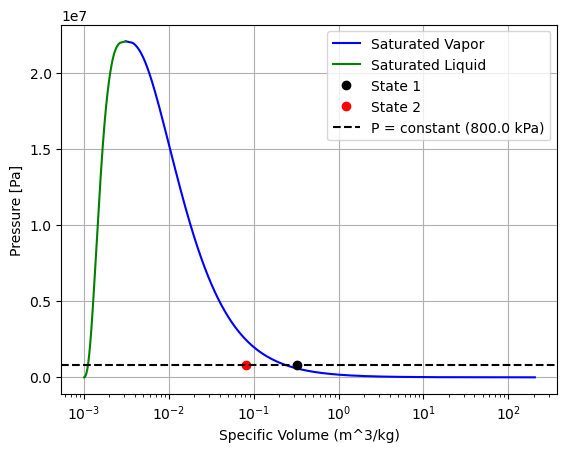

(b) Final temperature : 170.41 °C
(c) Vol change: -0.219 m³


In [3]:
###========== (a) Show the process on a T-v diagram: ================###
m = 0.9  # kg
T = 300 + 273.15  # Kelvin
pressure = 0.8e6  # Pa
fluid = "Water"
final_temp = CP.PropsSI("T", "Q", 0, "P", pressure, "water")
## quality 
q = 1/3
# const pressure process:
vol_state1 = 1 / CP.PropsSI("D", "T", T, "P", pressure, "water")
vol_state2 = 1 / CP.PropsSI("D", "P", pressure, "Q", q, "water")
state1 = [vol_state1, T]
state2 = [vol_state2, final_temp]
## use the following function:
plot_T_v_diagram(fluid,state1,state2,plot_const_press_line=True)
plot_p_v_diagram(fluid, [pressure,vol_state1], [pressure,vol_state2])
###========== (b) final temperature ================###
print("(b) Final temperature : {} °C".format(round(final_temp-273.15,2)))

###========== (c) change in Volume ================###
delV = m * (vol_state2 - vol_state1)
print("(c) Vol change: {} m³".format(round(delV,4)))
 

In [4]:
import pandas as pd
import CoolProp.CoolProp as CP
import numpy as np

# Data extraction and preparation
fluid = "Water"
T_min = CP.PropsSI("Tmin", fluid)
T_max = CP.PropsSI("Tcrit", fluid)
T_vals = np.linspace(T_min, T_max, 1000)

# Saturated Vapor
Q_vapor = 1
density_vapor = [CP.PropsSI("D", "T", T, "Q", Q_vapor, fluid) for T in T_vals]
vol_vapor = 1 / np.array(density_vapor)

# Saturated Liquid
Q_liquid = 0
density_liquid = [CP.PropsSI("D", "T", T, "Q", Q_liquid, fluid) for T in T_vals]
vol_liquid = 1 / np.array(density_liquid)

# Create DataFrame
df = pd.DataFrame({
    'Temperature (K)': T_vals,
    'Specific Volume Vapor (m^3/kg)': vol_vapor,
    'Specific Volume Liquid (m^3/kg)': vol_liquid
})

df.head()  # Display the first few rows of the DataFrame


,Temperature (K),Specific Volume Vapor (m^3/kg),Specific Volume Liquid (m^3/kg)
0,273.160000,205.991225,0.001
1,273.534310,200.744978,0.001
2,273.908621,195.648308,0.001
3,274.282931,190.696528,0.001
4,274.657241,185.885109,0.001


In [5]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [6]:
import pandas as pd
import plotly.express as px

# Create an interactive plot using Plotly
fig = px.line(df, x='Specific Volume Vapor (m^3/kg)', y='Temperature (K)', title='Temperature vs. Specific Volume (Vapor)')
fig.add_scatter(x=df['Specific Volume Liquid (m^3/kg)'], y=df['Temperature (K)'], mode='lines', name='Liquid')

# Show the plot
fig.show()
